In [16]:
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import zscore
import os
import urllib
import rastermap as rm
import imp
%matplotlib inline

# download 2-photon data (if not already downloaded)
if not os.path.isfile('data/mesoscope_activity.npy'):
    if not os.path.exists('data'):
        os.mkdir('data')
    response = urllib.request.urlopen('http://www.gatsby.ucl.ac.uk/~cstringer/mesoscope_activity.npy');
    f=open('data/mesoscope_activity.npy','wb')
    f.write(response.read())
    f.close()

# load downloaded data
dat = np.load('data/mesoscope_activity.npy', allow_pickle=True)
dat = dat.item()
sp  = dat['spks']
sp  = zscore(sp, axis=1)
xyloc = dat['xyloc']

In [19]:
model = rm.mapping.Rastermap(n_components=1).fit(sp)

nmin 200
0.18314003944396973
4.247912406921387
4.409424304962158
4.449718713760376
(38, 40)
(70,)
1.0
time; iteration;  explained PC variance
0.84s     0        0.0317      2
1.15s    10        0.1407      4
1.45s    20        0.1869      8
1.76s    30        0.2355      18
2.07s    40        0.2568      28
2.37s    50        0.2766      38
2.67s    60        0.2797      38
2.94s   final      0.2801
2.95s upsampled    0.2801


In [31]:
sp.shape

(6670, 6668)

In [20]:
### sort neurons and smooth across neurons and zscore in time
isort = np.argsort(model.embedding[:,0])
Sm = gaussian_filter1d(sp[isort,:].T, np.minimum(3,int(sp.shape[0]*0.005)), axis=1)
Sm = Sm.T

# (optional) smooth in time
#Sm = gaussian_filter1d(Sm, 1, axis=1)


In [30]:
len(isort)

6670

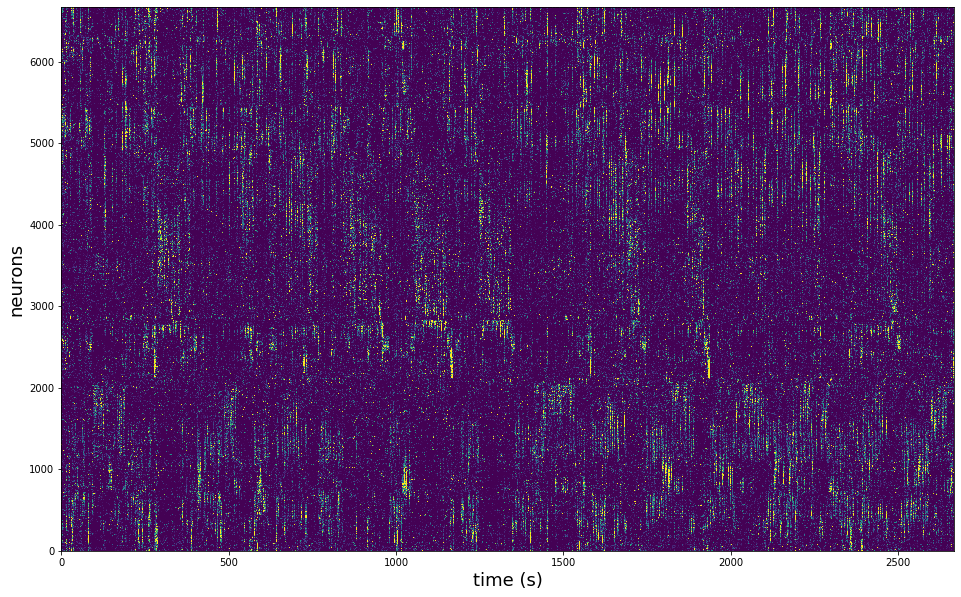

In [32]:
### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm
plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto',extent=[0,splot.shape[1]/fs, 0,splot.shape[0]])
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()

In [27]:
### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm[::-1,model]
plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto',extent=[0,splot.shape[1]/fs, 0,splot.shape[0]])
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
### view positions of cells colored by rastermap

# colormap
cmap = cm.get_cmap('hsv')
cmap = cmap(np.linspace(0.,1,sp.shape[0]))

plt.figure(figsize=(8,8))
# assign color based on embedding
plt.scatter(xyloc[:,0], xyloc[:,1], s=4, color=cmap[isort,:])
plt.xlabel('x location (um)')
plt.ylabel('y location (um)');
plt.show()